In [20]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

import seaborn as sns
import matplotlib.pyplot as plt

import lib

In [21]:
X,y = lib.generate_triangle()

In [22]:
estimator = DecisionTreeClassifier(max_leaf_nodes=4, random_state=0)
estimator.fit(X, y)

clf = estimator
n_nodes = estimator.tree_.node_count
children_left = estimator.tree_.children_left
children_right = estimator.tree_.children_right
feature = estimator.tree_.feature
threshold = estimator.tree_.threshold

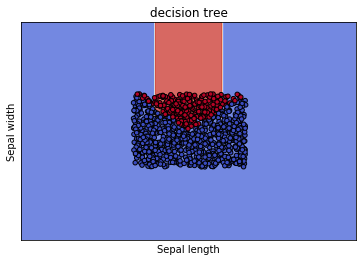

In [24]:
# C = 1.0  # SVM regularization parameter
# models = (svm.SVC(kernel='linear', C=C),
#           svm.LinearSVC(C=C, max_iter=10000),
#           svm.SVC(kernel='rbf', gamma=0.7, C=C),
#           svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
# models = (clf.fit(X, y) for clf in models)

title = "decision tree"
# titles = ('SVC with linear kernel',
#           'LinearSVC (linear kernel)',
#           'SVC with RBF kernel',
#           'SVC with polynomial (degree 3) kernel')

# # Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(1,1)
plt.subplots_adjust(wspace=0.5, hspace=0.5)

ax= sub

X0, X1 = X[:, 0], X[:, 1]
xx, yy = lib.make_meshgrid(X0, X1)

# for clf, title, ax in zip(models, titles, sub.flatten()):
lib.plot_contours(ax, clf, xx, yy,
              cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

plt.show()

In [ ]:
def plot_nodes(X,Y,feature,threshold):
    

    
    #####################################################
    
    dummy_var = np.arange(start = 0, stop = 1, step = 0.01, dtype=None) 

    sns.set(style="whitegrid")

    f, ax = plt.subplots(figsize=(6.5, 6.5))
    sns.despine(f, left=True, bottom=True)
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=Y, ax=ax)
    
    ######################################################
    
    new_feature = feature[feature!=-2]
    new_threshold = threshold[threshold!=-2]
    
    for i in range(len(new_feature)):
        if new_feature[i]:
#             sns.lineplot(x=dummy_var, y=[new_threshold[i]]*len(dummy_var))
            plt.axhline(new_threshold[i], color='red')
        
        else:
#             sns.lineplot(x=[new_threshold[i]]*len(dummy_var), y=dummy_var)
            plt.axvline(new_threshold[i], color='red')

In [ ]:
new_threshold = threshold[threshold!=-2]
new_feature = feature[feature!=-2]
new_feature*new_threshold
len(new_feature)
dummy_var = np.arange(start = 0, stop = 1, step = 0.01, dtype=None) 

In [ ]:

plot_nodes(X,Y,feature,threshold)

Pytorch Logistic Regression

In [ ]:
import torch
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets

class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = self.linear(x)
        return outputs
    
batch_size = 100
n_iters = 3000
epochs = n_iters / (len(Y) / batch_size)
input_dim = 784
output_dim = 10
lr_rate = 0.001

model = LogisticRegression(2, 2)

criterion = torch.nn.CrossEntropyLoss() # computes softmax and then the cross entropy
optimizer = torch.optim.SGD(model.parameters(), lr=lr_rate)

iter = 0
for epoch in range(int(epochs)):
    for i, (Xi, Yi) in enumerate(zip(X,Y)):
        Xi = torch.tensor(Xi).float()
        print(Xi)
        Yi = torch.tensor(Yi)
        
        optimizer.zero_grad()
        outputs = model(Xi)
        loss = criterion(outputs.view(-1,1), Yi.view(1,1))
        loss.backward()
        optimizer.step()

        iter+=1
#         if iter%500==0:
#             # calculate Accuracy
#             correct = 0
#             total = 0
#             for images, labels in test_loader:
#                 images = Variable(images.view(-1, 28*28))
#                 outputs = model(images)
#                 _, predicted = torch.max(outputs.data, 1)
#                 total+= labels.size(0)
#                 # for gpu, bring the predicted and labels back to cpu fro python operations to work
#                 correct+= (predicted == labels).sum()
#             accuracy = 100 * correct/total
#             print("Iteration: {}. Loss: {}. Accuracy: {}.".format(iter, loss.item(), accuracy))

In [ ]:
#(model(Xi))
outputs

In [ ]:
Yi.view(1).shape

In [ ]:
outputs.view(-1,1).shape